# ARIMA 모형 차수 결정의 예

다음과 같은 방법을 사용하면 ARIMA 모형의 차수를 결정하기 위한 정보를 얻을 수 있다.

* Augmented Dickey-Fuller 검정
* 자기상관계수 함수
* 편자기상관계수 함수

이러한 방법을 실제 시계열 자료에 적용하여 ARIMA 모형의 차수를 알아보자.

## 강우량 시계열

다음 자료는 미국 강수량 자료이다

In [1]:
data = sm.datasets.get_rdataset("precip")
df = data.data
df.tail()

,x
65,17.4
66,40.8
67,29.1
68,14.6
69,59.2


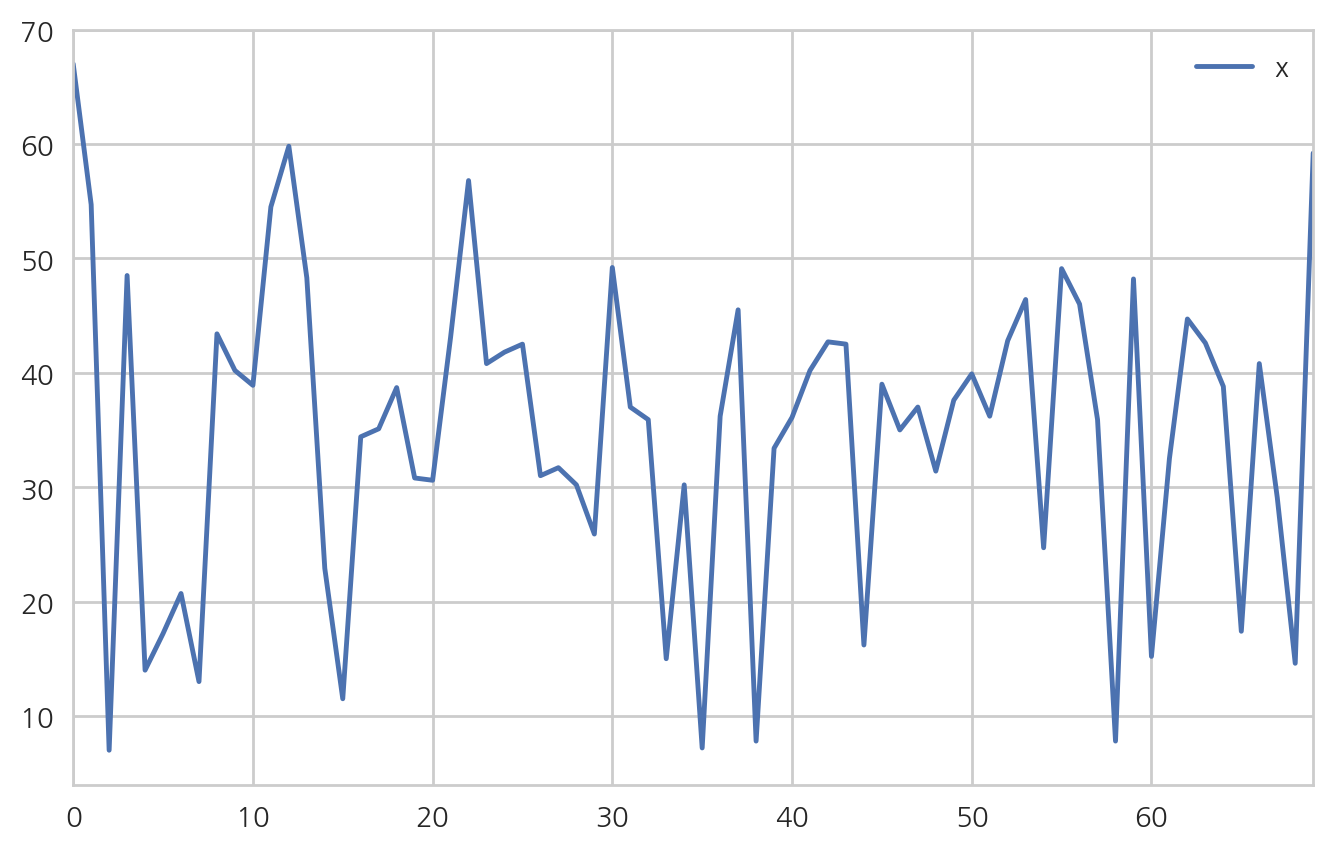

In [2]:
df.plot()
plt.show()

시계열의 ACF와 PACF를 그리면 아래와 같다. $k=0$을 제외하고는 유의미한 자기상관계수 혹은 편자기상관계수의 시차를 찾을 수 없다. 따라서 이 시계열은 가우시안 백색 잡음으로 볼 수 있다.

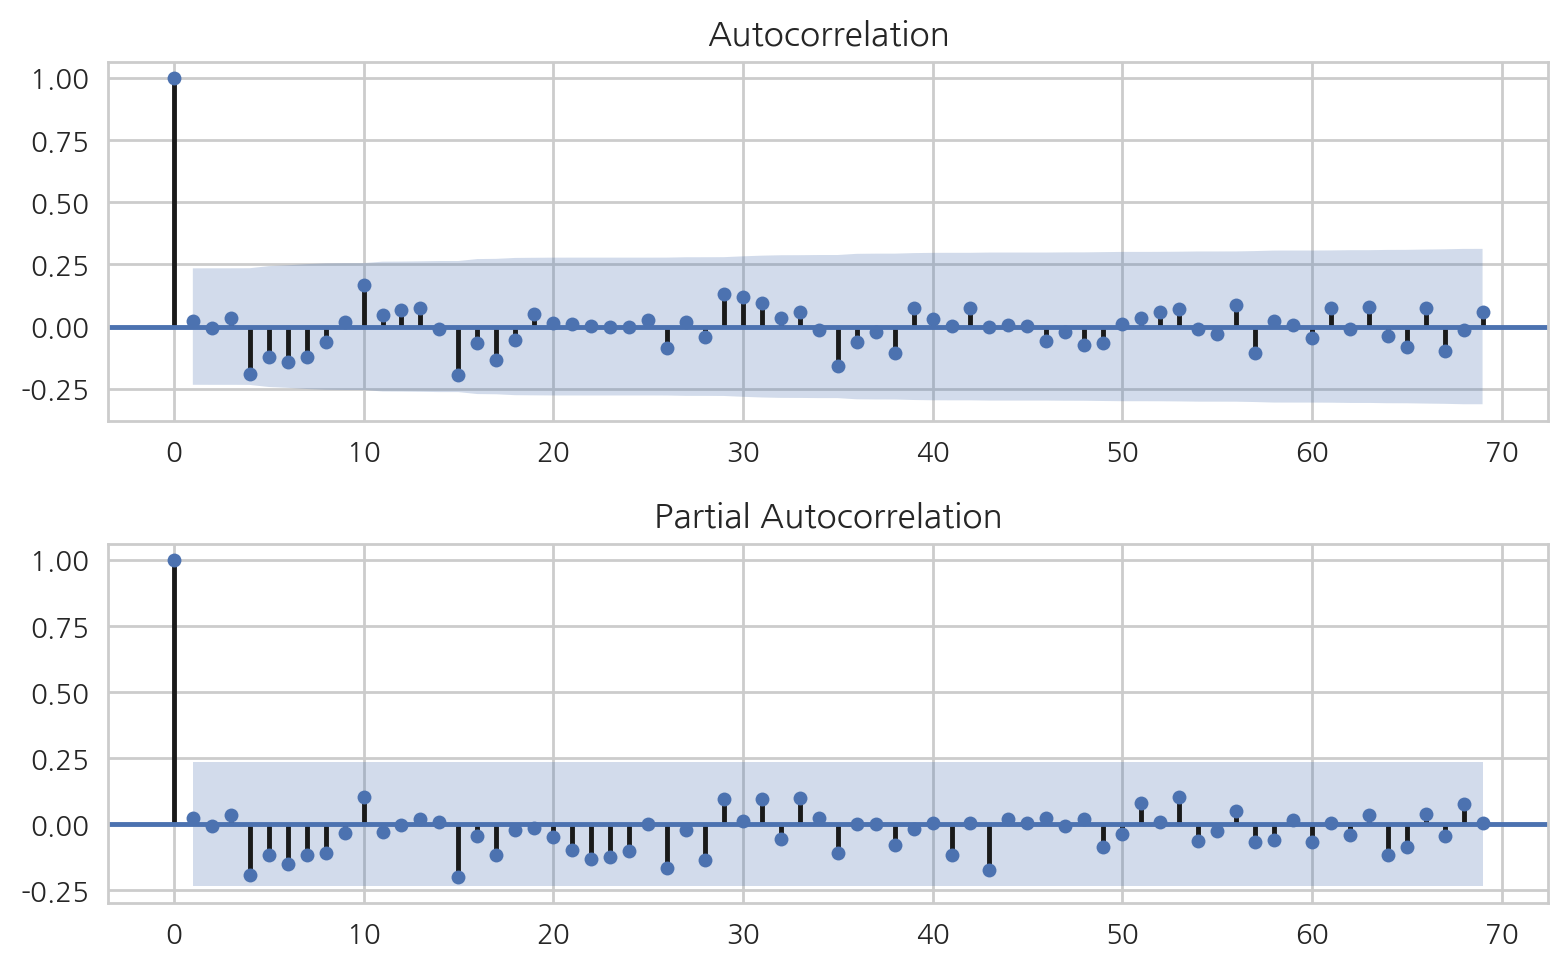

In [3]:
ax1 = plt.subplot(211); sm.graphics.tsa.plot_acf(df.x, ax=ax1);
ax2 = plt.subplot(212); sm.graphics.tsa.plot_pacf(df.x, ax=ax2);
plt.tight_layout()
plt.show()

## 황체형성 호르몬 수치 시계열

다음 자료는 황체형성 호르몬 수치 시계열에 대한 시계열 자료이다.

In [4]:
data = sm.datasets.get_rdataset("lh")
df = data.data
df.tail()

,time,lh
43,44,2.6
44,45,2.1
45,46,3.4
46,47,3.0
47,48,2.9


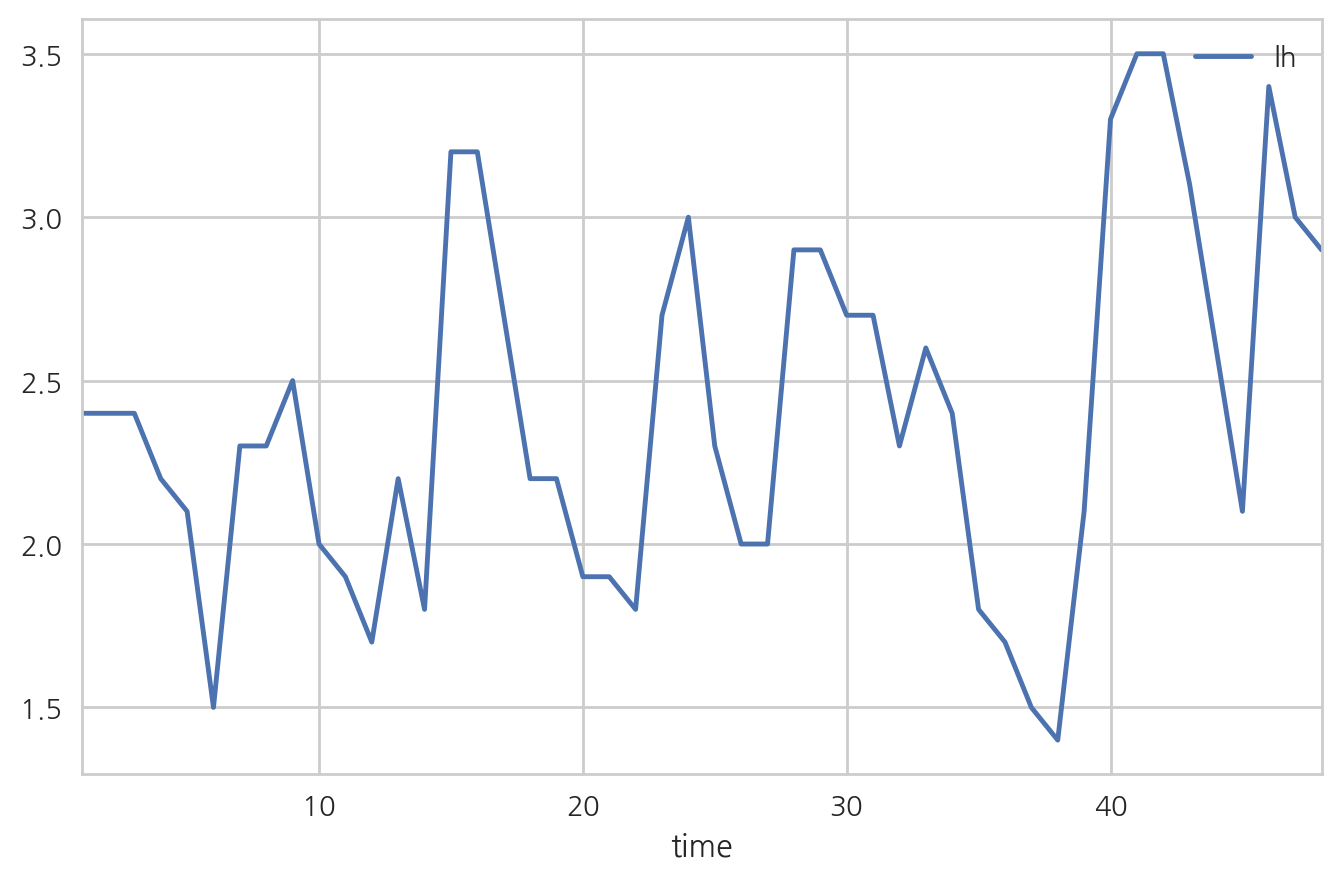

In [5]:
df.plot(x="time", y="lh")
plt.show()

ACF가 지수함수적으로 감소하고 PACF가 1차항에 대해서만 유의한 값을 가지므로 AR(1) 으로 볼 수 있다.

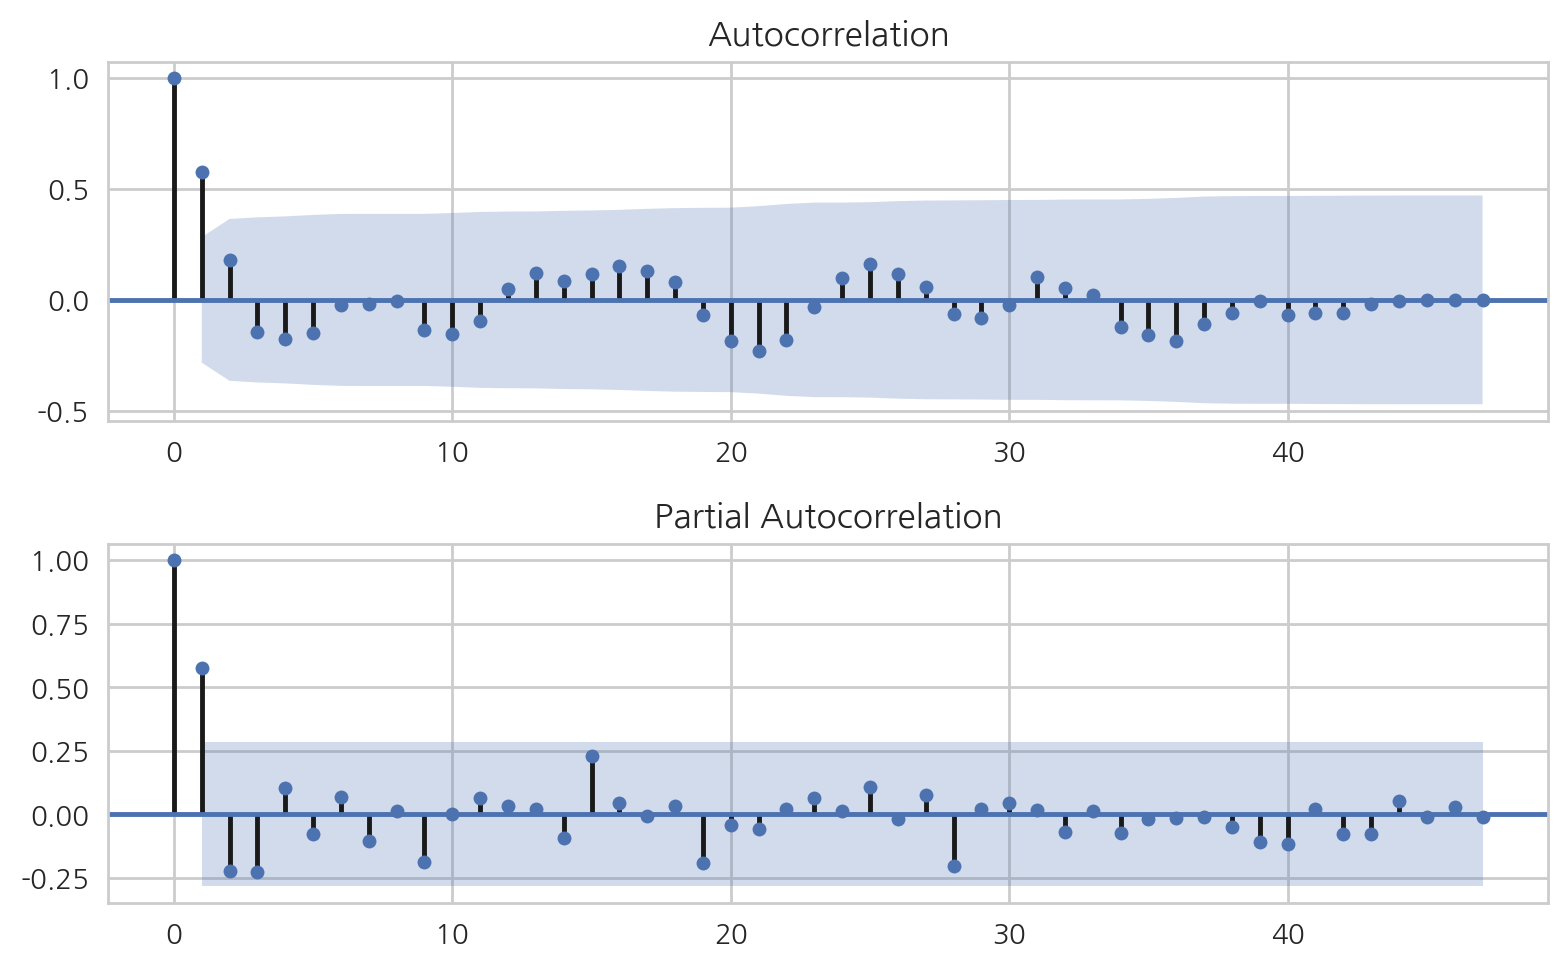

In [6]:
ax1 = plt.subplot(211); sm.graphics.tsa.plot_acf(df.lh, ax=ax1)
ax2 = plt.subplot(212); sm.graphics.tsa.plot_pacf(df.lh, ax=ax2)
plt.tight_layout()
plt.show()

## 호흡기질환 사망자수

다음 시계열 자료는 호흡기질환 사망자수에 대한 연구 자료이다.

In [7]:
data = sm.datasets.get_rdataset("deaths", "MASS")
df = data.data
df.tail()

,time,deaths
67,1979.583333,1354
68,1979.666667,1333
69,1979.750000,1492
70,1979.833333,1781
71,1979.916667,1915


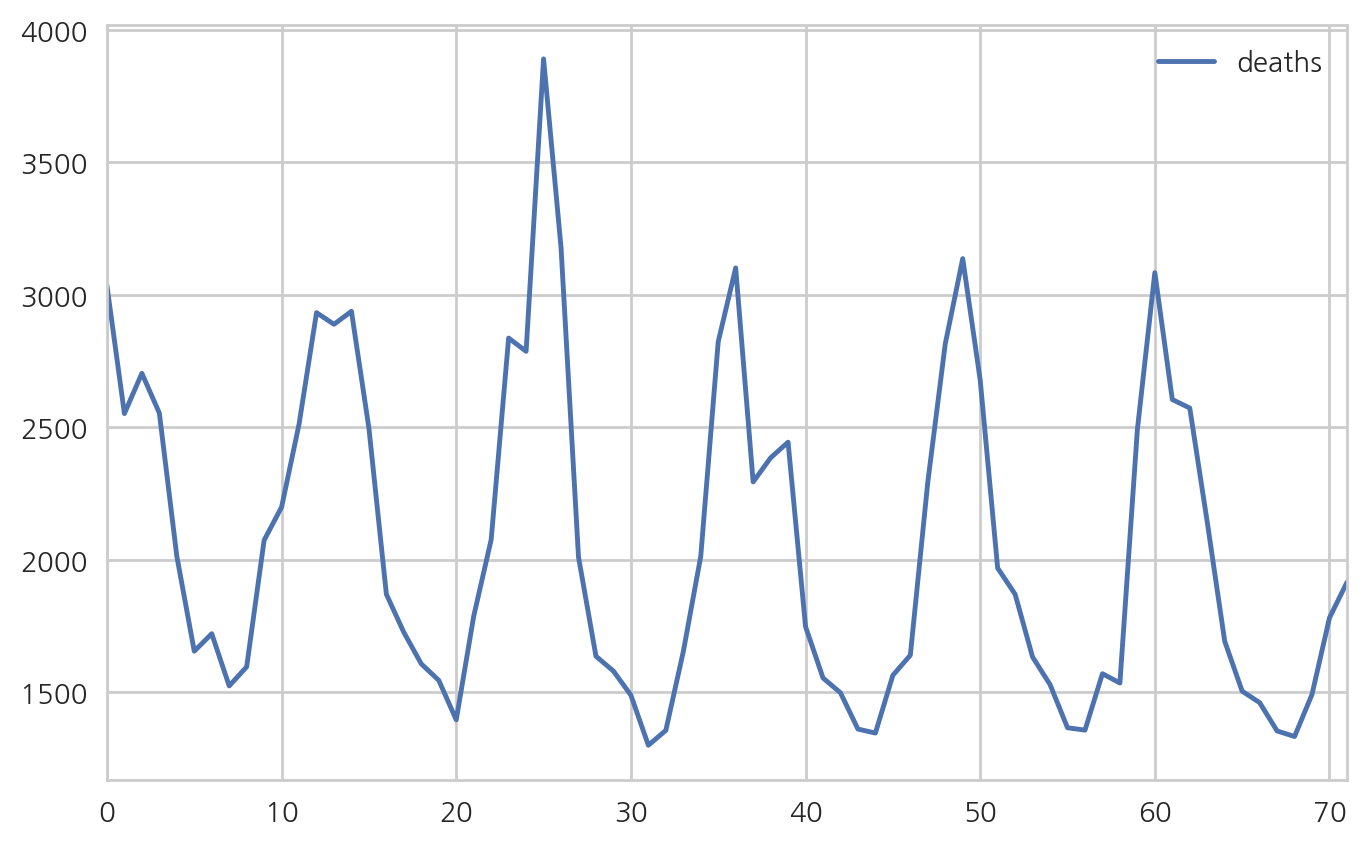

In [8]:
df.plot(y="deaths")
plt.show()

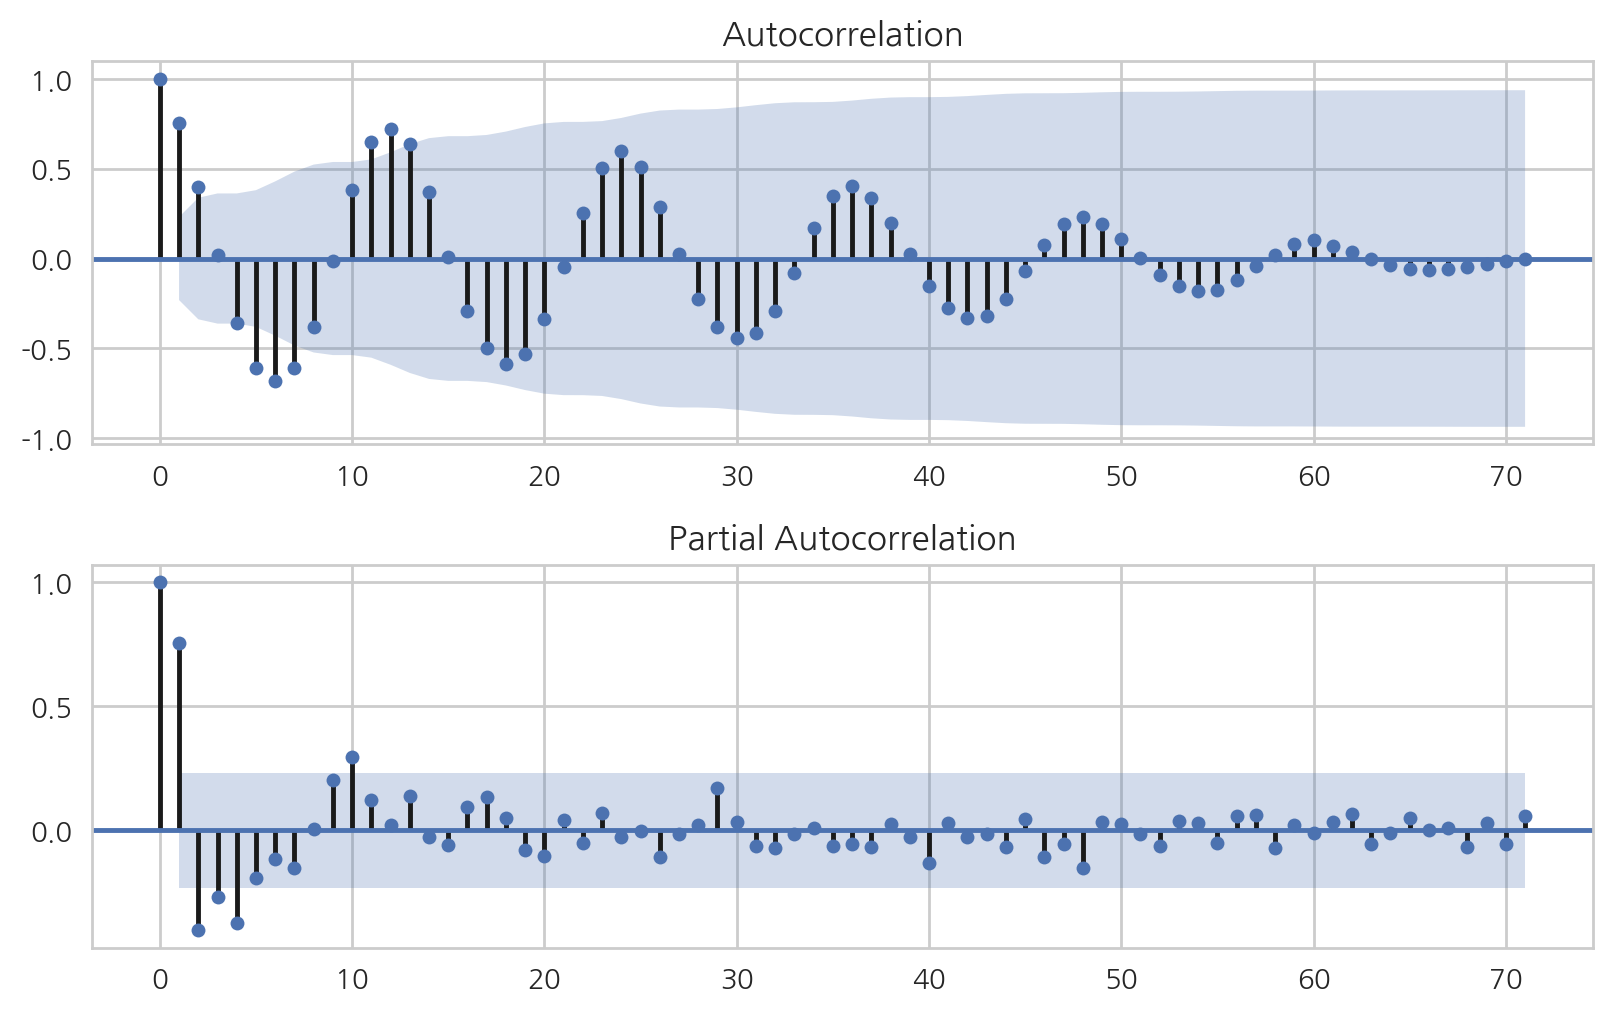

In [9]:
ax1 = plt.subplot(211); sm.graphics.tsa.plot_acf(df.deaths, ax=ax1)
ax2 = plt.subplot(212); sm.graphics.tsa.plot_pacf(df.deaths, ax=ax2)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

ACF가 지수함수적으로 감소하는 주기적 파형을 보이고 PACF가 2차항까지 유의한 값을 가지므로 AR(2) 모형으로 볼 수 있다.

## 항공운송량

다음 시계열 자료는 항공운송량을 나타낸 것이다.

In [10]:
data = sm.datasets.get_rdataset("AirPassengers")

In [11]:
df = data.data
df.tail()

,time,AirPassengers
139,1960.583333,606
140,1960.666667,508
141,1960.750000,461
142,1960.833333,390
143,1960.916667,432


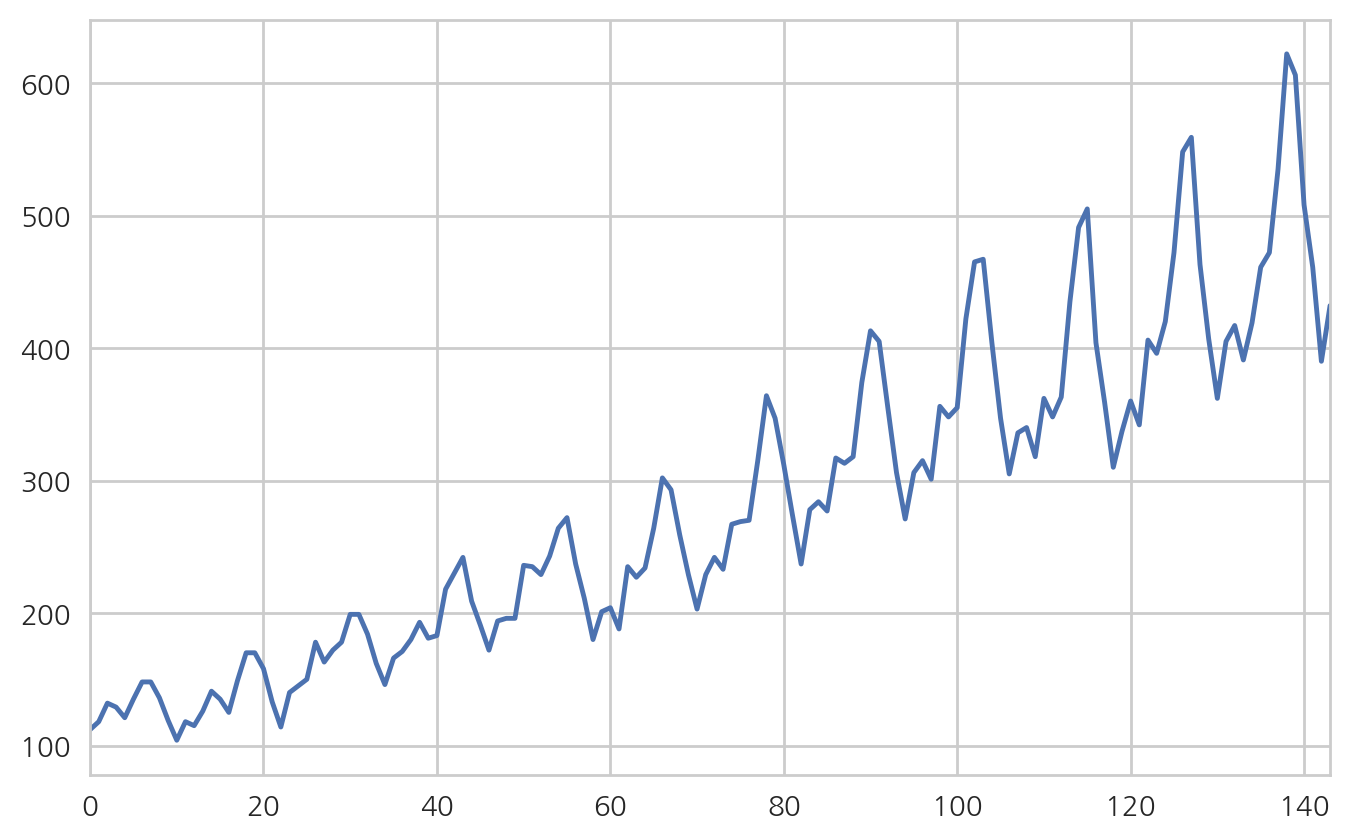

In [12]:
df["AirPassengers"].plot()
plt.show()

In [13]:
df["logAP"] = np.log(df.AirPassengers)

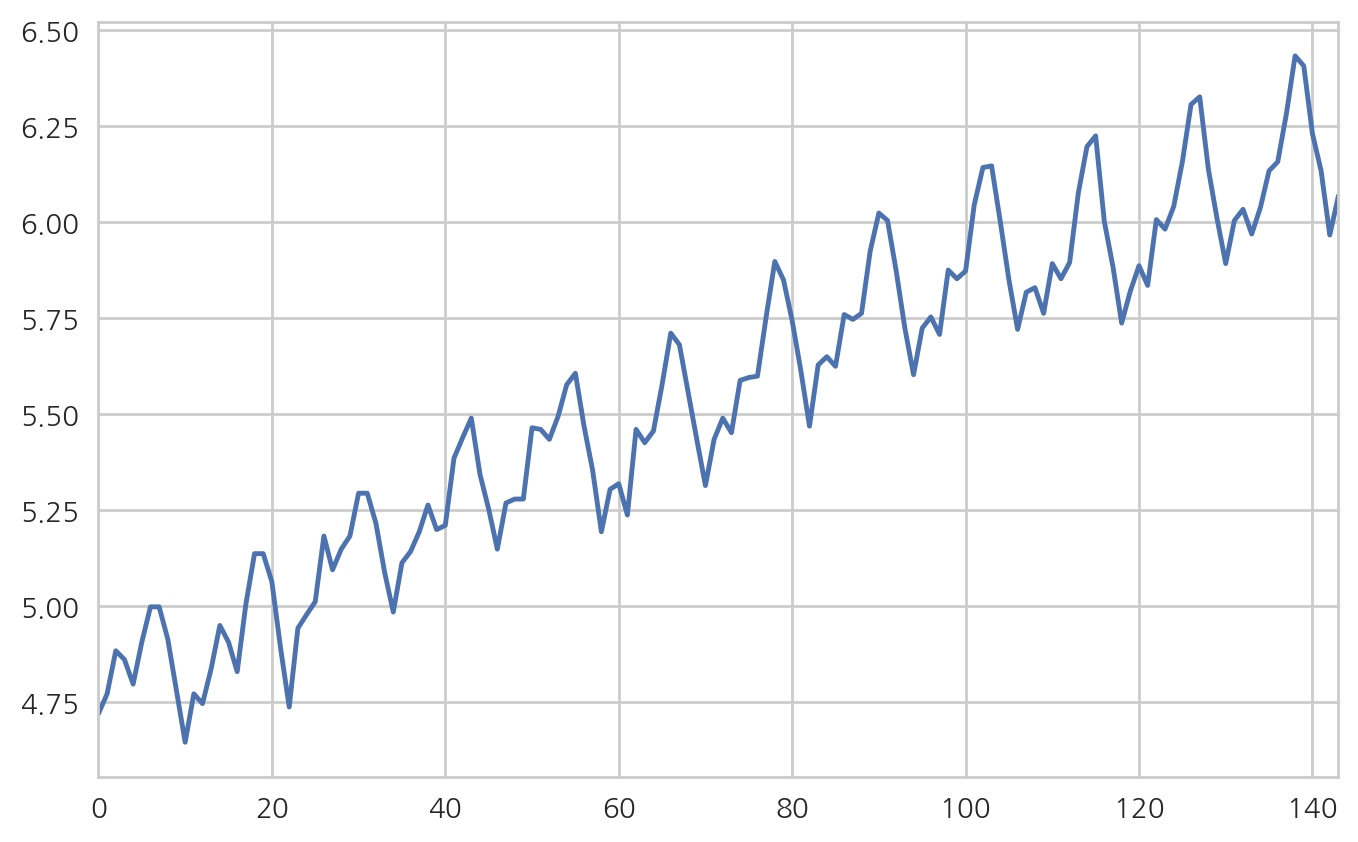

In [14]:
df["logAP"].plot()
plt.show()

다음과 같이 ADF 검정을 통해 차분 변환이 필요함을 증명할 수도 있다. 

In [15]:
sm.tsa.adfuller(df.logAP)

(-1.7170170891069605,
 0.42236677477039125,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.5787700591715979,
  '5%': -2.8840418343195267},
 -445.39903124972091)

In [16]:
df["logAPdiff"] = df.logAP.diff()
df = df.iloc[1:, :]
df.tail()

,time,AirPassengers,logAP,logAPdiff
139,1960.583333,606,6.406880,-0.026060
140,1960.666667,508,6.230481,-0.176399
141,1960.750000,461,6.133398,-0.097083
142,1960.833333,390,5.966147,-0.167251
143,1960.916667,432,6.068426,0.102279


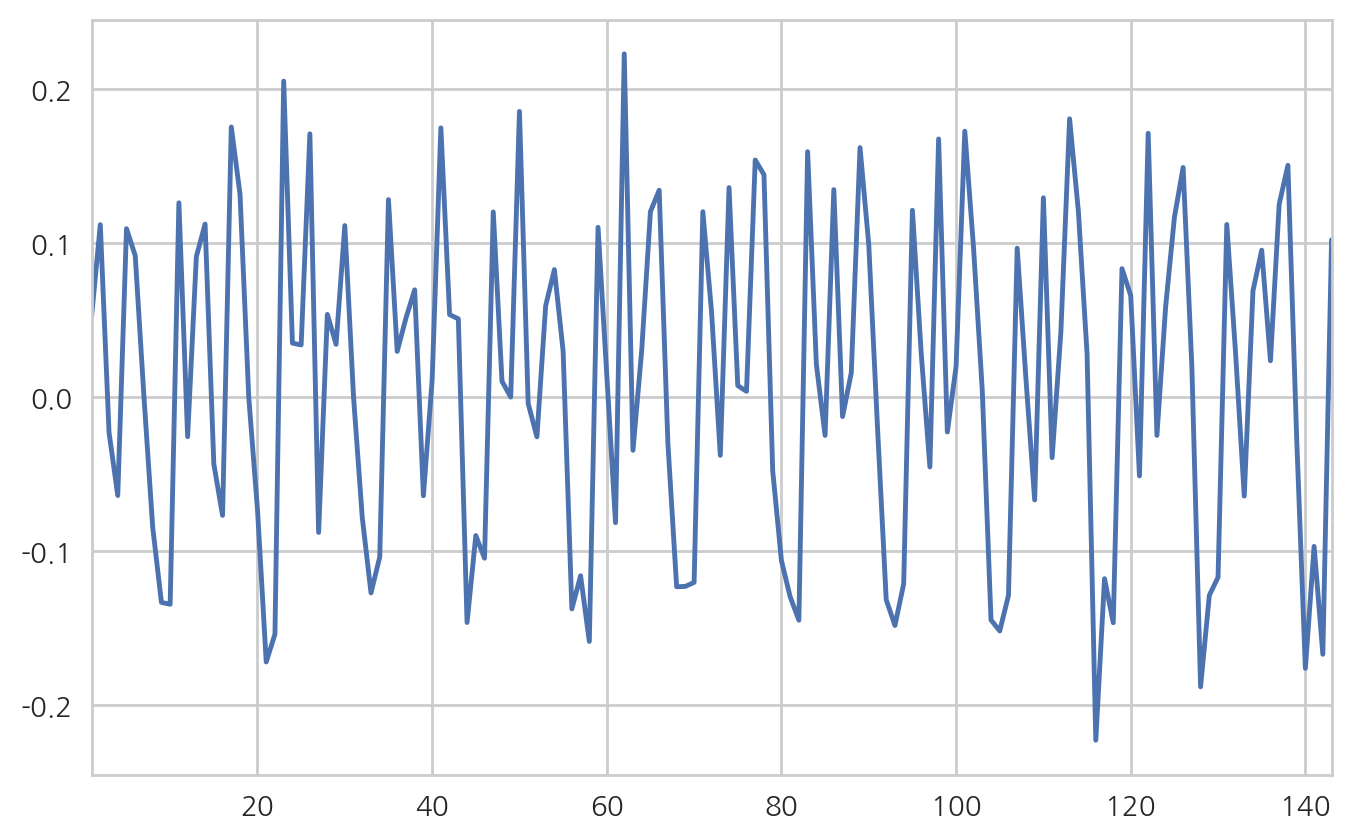

In [17]:
df["logAPdiff"].plot()
plt.show()

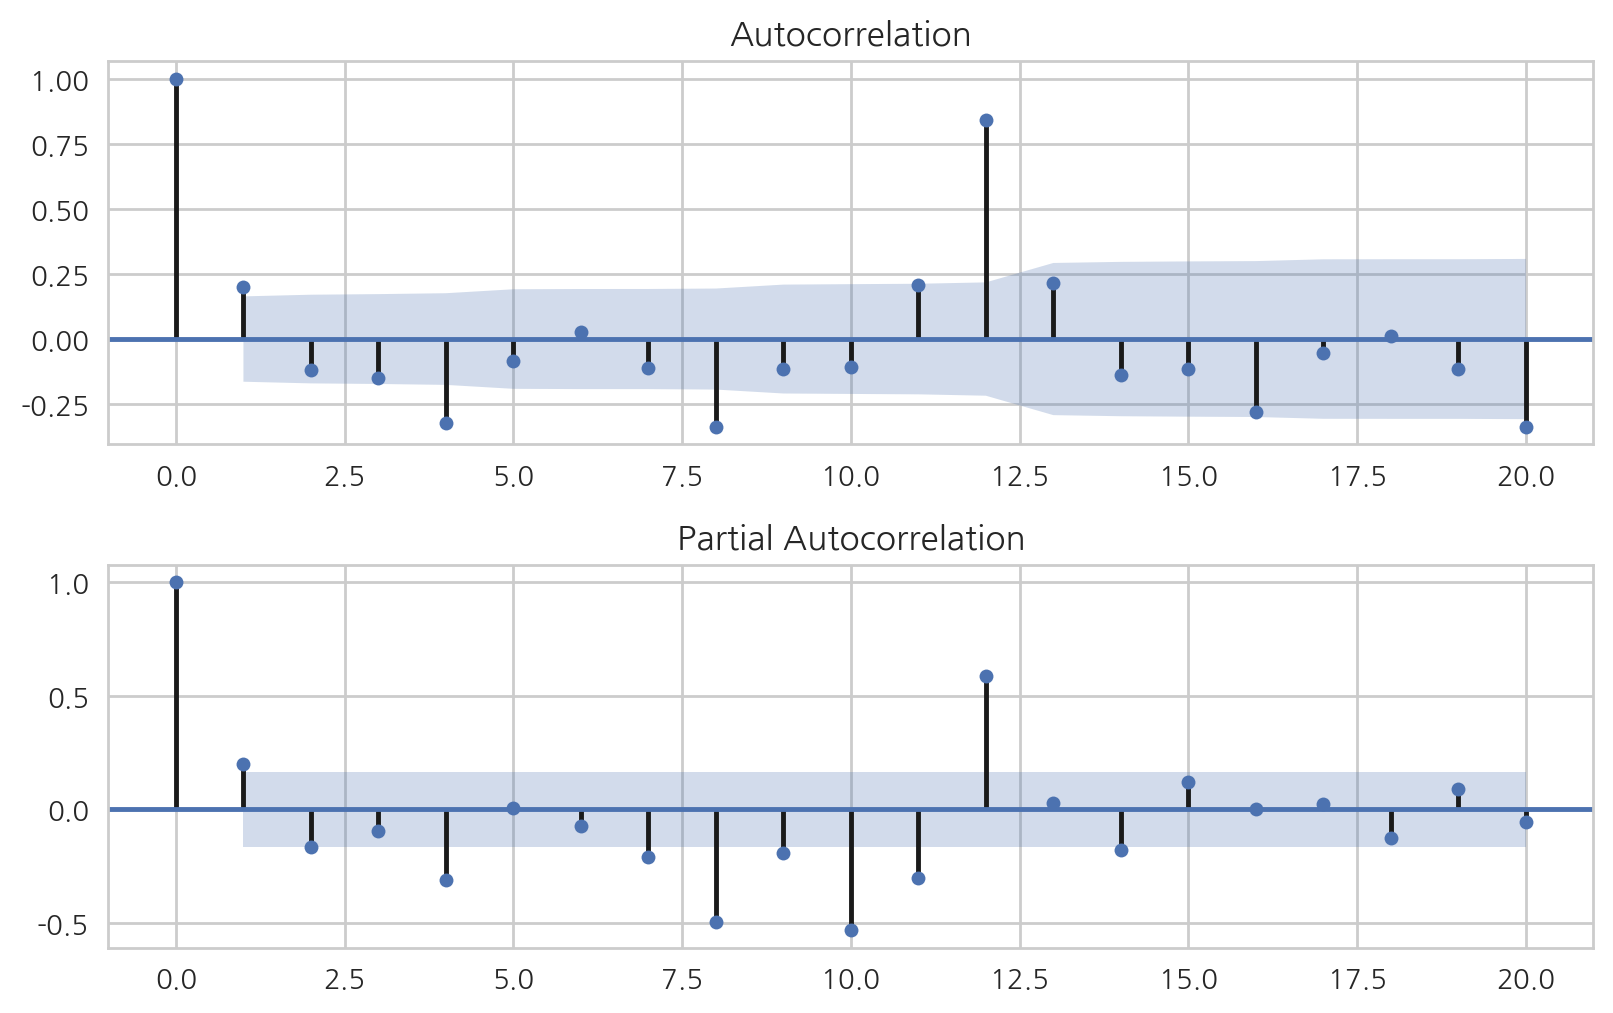

In [18]:
ax1 = plt.subplot(211); sm.graphics.tsa.plot_acf(df["logAPdiff"], lags=20, ax=ax1)
ax2 = plt.subplot(212); sm.graphics.tsa.plot_pacf(df["logAPdiff"], lags=20, ax=ax2)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

시차 12를 두고 강한 상관관계를 보인다. 이러한 시계열은 Seasonal 모형을 사용해야 한다.